In [44]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing/bank-additional-full.csv
/kaggle/input/bank-marketing/bank-additional-names.txt


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [46]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep = ';')
df['y'] = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [52]:
print('Info\n', df.info())
print('Describe\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
print('Jobs:\n', df['job'].unique())
print('Marital:\n', df['marital'].unique())
print('Education:\n', df['education'].unique())
print('Default:\n', df['default'].unique())
print('Housing:\n', df['housing'].unique())
print('Loan:\n', df['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1f1973d50>,
      dtype=object)

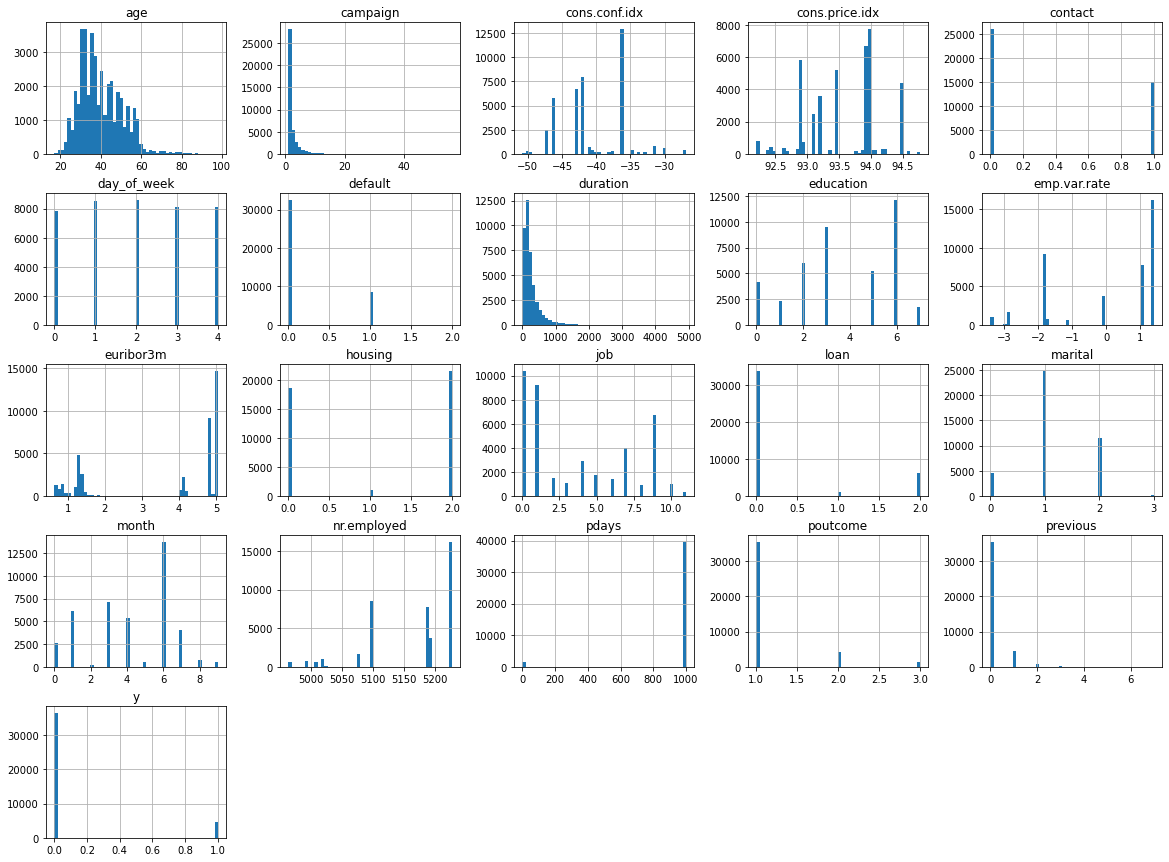

In [51]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))

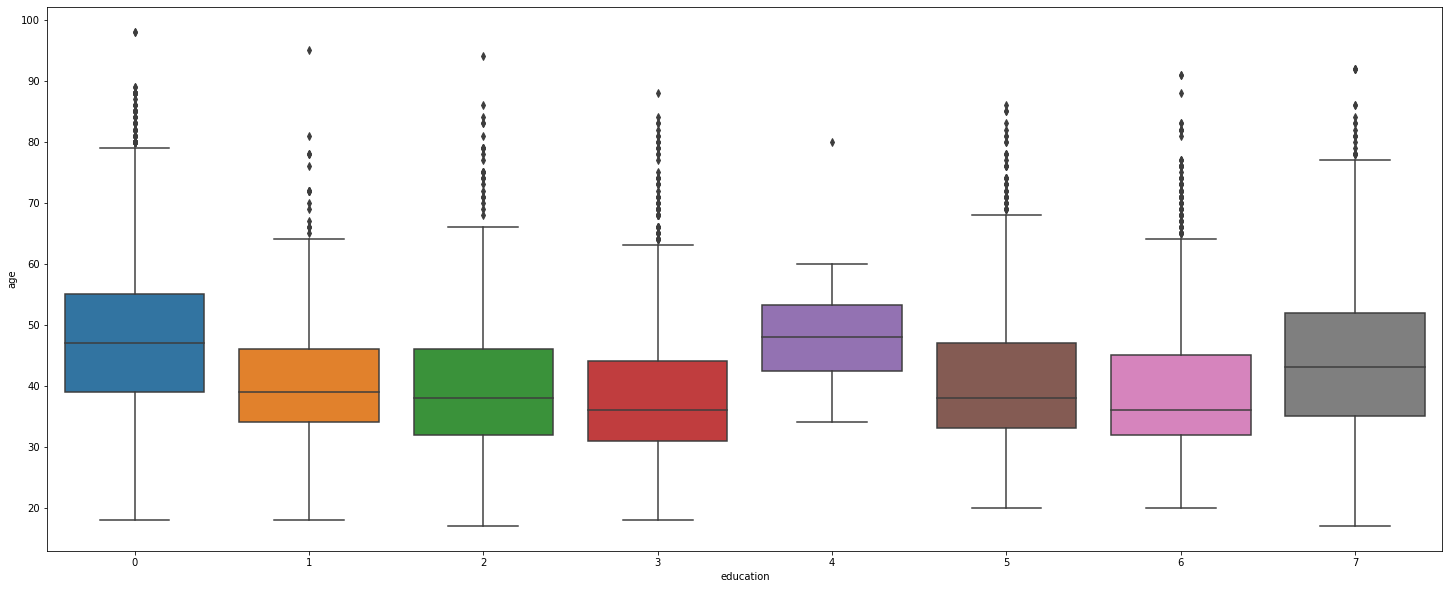

In [54]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="education", y="age", data=df)

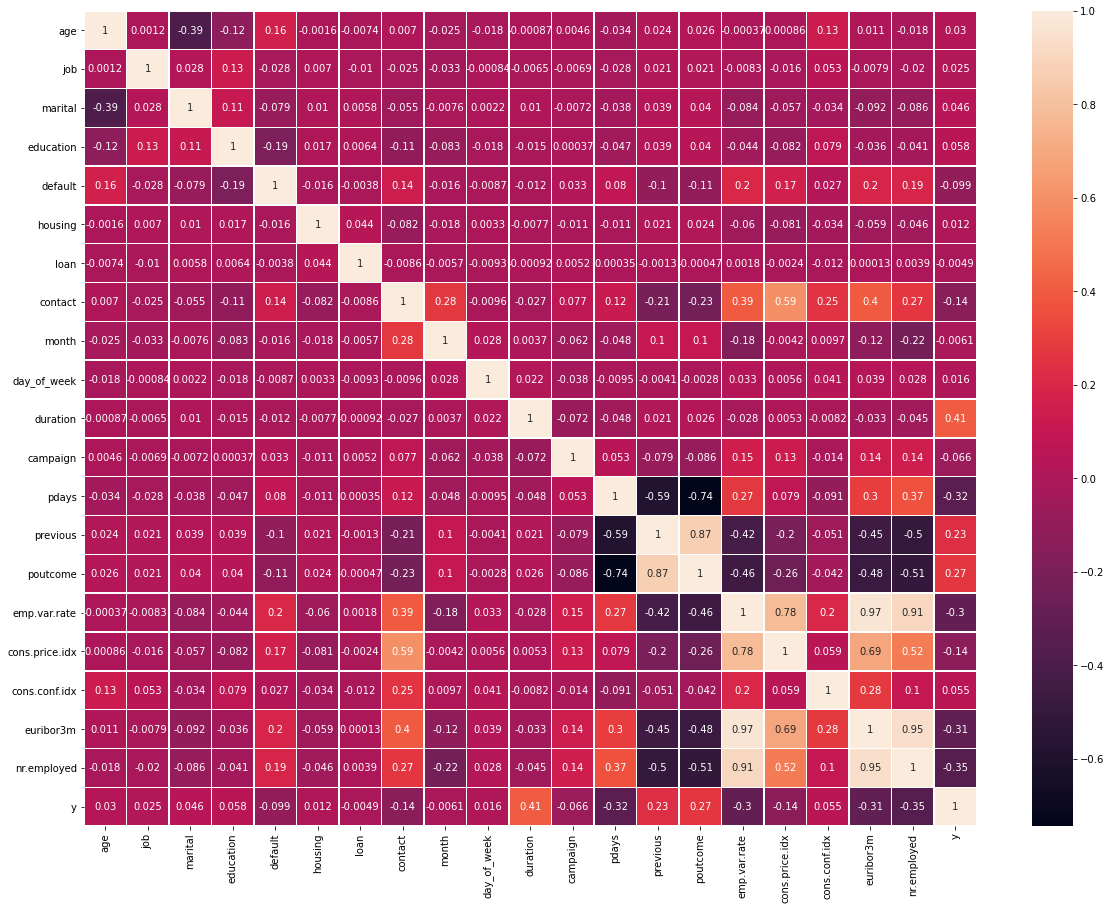

In [55]:
plt.figure(figsize=(20,15))  
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week'])
df['job'] = labelencoder_X.fit_transform(df['job'])
df['marital'] = labelencoder_X.fit_transform(df['marital'])
df['education'] = labelencoder_X.fit_transform(df['education'])
df['default'] = labelencoder_X.fit_transform(df['default'])
df['housing'] = labelencoder_X.fit_transform(df['housing'])
df['loan'] = labelencoder_X.fit_transform(df['loan'])
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [50]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
